# MMMSE Estimation

(Minimum Mean Squared Error)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Part 1 - Filtering a noisy signal

Temperature measurements in a physical process are modeled through a continuous random variable $Y$ following a Gaussian distribution with mean $30$ and variance $1.5$. Suppose we observe $Y$ with an additive random error $W$. In particular, we observe the random variable $X = Y + W$, where the noise $W$ is modeled as a Gaussian variable with mean $0$ and variance $1$. The variable $W$ is independent of $Y$.

### a) First, we generate observations of $Y$ and the corresponding value of $X$, and we plot them as 2D points in a $X$ vs. $Y$ plane.

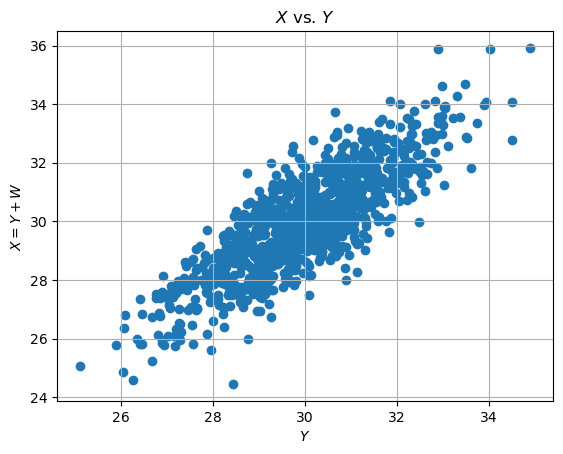

In [2]:
# Known parameters of the random variable (RV) Y are declared.
muY = 30
sigmaY = 1.5

# Known parameters of the RV W are declared.
muW = 0
sigmaW = 1

# Known parameters of the RV X are declared.
muX = muY + muW
sigmaX = sigmaY + sigmaW # Since Y and W are independent RVs and hence uncorrelated.

# 1000 samples of RVs Y and W are generated.
Y = np.random.normal(muY, sigmaY, 1000)
W = np.random.normal(muW, sigmaW, 1000)

# Samples of RV X are generated.
X = Y + W

# Y is plotted as the independent variable and X as the dependent variable.
plt.scatter(Y, X)
plt.grid()
plt.xlabel(r'$Y$')
plt.ylabel(r'$X = Y + W$')
plt.title(r'$X$ vs. $Y$')
plt.show()


### b) Next, we find the multivariate Gaussian distribution of the vector $Z = [Y, X]^T$, and we plot the contour lines of the PDF of $Z$ in a figure with the data found in a) overlapped.

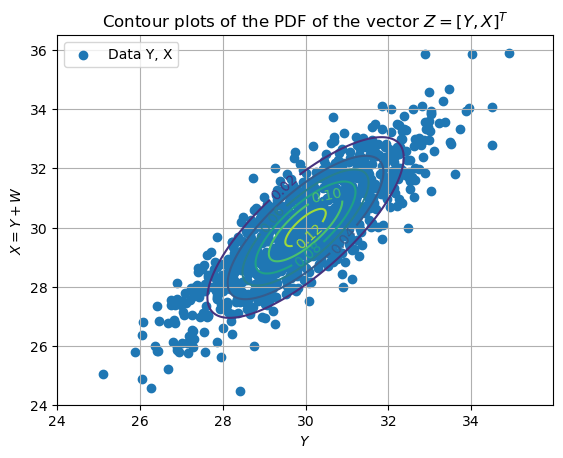

In [3]:
# Mean vector of the random vector Z is generated.
muZ = [muY, muX]

# Covariance between Y and X is declared as sigmaY, and based on this information, the covariance matrix Cz is constructed.
# covYX = cov(Y, Y+W) = cov(Y, Y) + cov(Y, W) = sigmaY + 0 (uncorrelated since they are independent)
covYX = sigmaY
Cz = np.array([[sigmaY, covYX], [covYX, sigmaX]])

# Vectors with 'x' and 'y' values are generated to create a grid (X1, Y1) on which to draw contour plots.
step = 0.025
x = np.arange(24, 35, step)
y = np.arange(24, 36, step)

# Grid (X1, Y1) is generated. X1 and Y1 are matrices representing points in the R^2 plane.
X1, Y1 = np.meshgrid(x, y)

# The multivariate_normal function is used to define the Gaussian function on the Z axis generated with the different data in Y1 and X1.
# The vector Z is defined as the Gaussian pdf represented by the mean vector muZ and the covariance matrix Cz.
pos = np.dstack((Y1, X1))
rv = multivariate_normal(muZ, Cz)
Z = rv.pdf(pos)

# Contour plots of the pdf of Z are plotted along with the data X and Y provided in the text file.
fig, ax = plt.subplots()
CS = plt.contour(Y1, X1, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_xlabel(r'$Y$')
ax.set_ylabel(r'$X=Y+W$')
ax.set_title(r'Contour plots of the PDF of the vector $Z = [Y, X]^T$')
ax.grid()
plt.scatter(Y, X)
plt.legend(['Data Y, X'])
plt.show()


### c) Now, we find the function of the Minimum Mean Squared Error (MMSE) estimator of $Y$ based on $X$.


The MMSE linear estimator of the random variable $Y$ based on $X$ is given by the expression

$$Y_{hat}(x) = E[Y] + \frac{\text{cov}(Y, X)}{\sigma_X^2}[X - E[X]]$$

Since $X=Y+W$ is independent of $W$, it is known that:
- $E[X] = E[Y] + E[W]$
- $\sigma_X^2 = \text{var}(Y+W) = \sigma_Y^2 + \sigma_W^2$
- $\text{cov}(Y, X) = \text{cov}(Y,Y+W) = \text{cov}(Y, Y) + \text{cov}(Y, W) = \sigma_Y^2 + 0 = \sigma_Y^2 $


In [4]:
# Function defining the estimation of RV Y based on RV X is defined.
def Yhat(muY, muX, sigmaX, sigmaY, X):
    return muY + (sigmaY/sigmaX)*(X-muX)

# Different values of X are created to estimate the value of RV Y.
X_est = np.linspace(0, 50, 50)
Yh = []

# For each value of X in X_est, calculate its corresponding estimated Y.
for i in range(len(X_est)):
    Yh.append(Yhat(muY, muX, sigmaX, sigmaY, X_est[i]))


### d) Finally, we plot the resulting function with respect to the possible values of $X$, i.e., we plot $Y_{hat}$ vs $X$ (where $Y_{hat}$ is the estimation of $Y$). We know that $X = Y+W$, meaning that there are noisy observations of a variable.


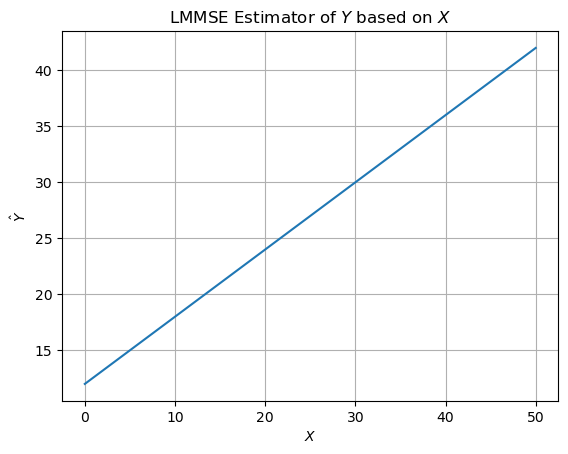

In [5]:
# Linear MMSE estimator created in the previous cells is plotted.
plt.plot(X_est, Yh)
plt.grid()
plt.xlabel(r'$X$')
plt.ylabel(r'$\hat{Y}$')
plt.title(r'LMMSE Estimator of $Y$ based on $X$')
plt.show()

A straight line was obtained as expected, and it can be said that, having the values of $X$, the values of the variable $Y$ ($Y_{hat}(x)$) can be estimated according to the equation of this line, i.e., through

$$Y_{hat}(x) = E[Y] + \frac{\text{cov}(Y, X)}{\sigma_X^2}[X - E[X]]$$

$$Y_{hat}(x) = 30 + \frac{1.5}{2.5}[X - 30]$$

$$Y_{hat}(x) = \frac{3}{5}X + 12$$

This line is a reasonable estimation of the random variable $Y$, given that it is known to be a noisy variable ($X$ is contaminated with random noise). However, it is precisely because of this contamination that the estimation will not be perfect and may yield values of $Y$ that are slightly different from the values observed in reality.


# Part 2 - Temperature and Humidity Experiment

Temperature measurements $T$ (units in $°C$) and relative humidity $H$ (units in $\%$) in a real greenhouse of a rose crop are modeled as **joint Gaussian random variables** through the random vector $Z = [T, H]^T$, whose mean vector and covariance matrix are unknown. However, several observations of $Z$ are obtained and saved in the file *dataZ.txt*.


### a) First, we plot $H$ vs. $T$

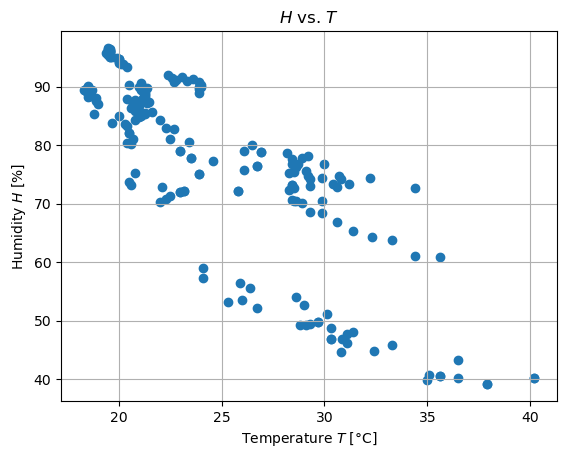

In [6]:
# Data is imported from the .txt file.
filename = 'dataZ.txt'
T = np.loadtxt(filename)[:, 0]
H = np.loadtxt(filename)[:, 1]

# Dependent variable against independent variable is plotted on the R^2 plane.
plt.scatter(T, H)
plt.grid()
plt.xlabel(r'Temperature $T$ [°C]')
plt.ylabel(r'Humidity $H$ [%]')
plt.title(r'$H$ vs. $T$')
plt.show()


An inversely proportional relationship can be observed between the humidity and temperature variables in the greenhouse: as the temperature increases, the humidity decreases, and vice versa.

Likewise, it can be noted that most of the data fall within a temperature range between 18°C and 25°C, corresponding to a range of humidity values around 70% to 95%.

The relationship between the variables appears to have an approximately linear trend for all ranges of temperature and humidity.


### b) Now, we find the estimation of the mean vector and the covariance matrix from the obtained data, and we obtain the joint PDF resulting from these estimated parameters.


Estimated mean of T: 24.792800000000003

Estimated mean of H: 76.748

Estimated covariance matrix:
 [[ 26.71911172 -68.84481849]
 [-68.84481849 253.19949347]]



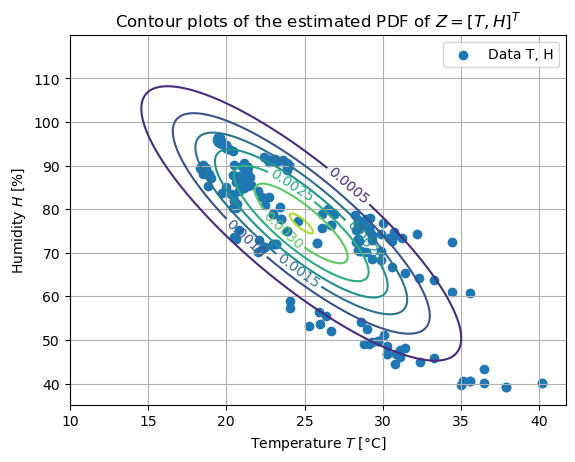

In [7]:
# Mean of each random variable and the covariance matrix between the two random variables are found
# using NumPy's built-in functions for such purposes.
muT_estim = np.mean(T)
muH_estim = np.mean(H)
mat_cov_estim = np.cov(np.stack((T, H), axis=0))

print(f'Estimated mean of T: {muT_estim}\n')
print(f'Estimated mean of H: {muH_estim}\n')
print(f'Estimated covariance matrix:\n {mat_cov_estim}\n')

# Vectors with 't' and 'h' values are generated to create a grid (T1, H1) on which to draw contour plots.
step = 0.05
t = np.arange(10, 40, step)
h = np.arange(40, 120, step)

# Grid (T1, H1) is generated. T1 and H1 are matrices representing points in the R^2 plane.
T1, H1 = np.meshgrid(t, h)

# The multivariate_normal function is used to define the Gaussian function on the Z axis generated with the different data in H1 and T1.
# The vector Z is defined as the Gaussian pdf represented by the mean vector [muT_estim, muH_estim] and the covariance matrix mat_cov_estim.
pos = np.dstack((T1, H1))
rv = multivariate_normal([muT_estim, muH_estim], mat_cov_estim)
Z = rv.pdf(pos)

# Contour plots of the pdf of Z are plotted along with the data T and H provided in the text file.
fig, ax = plt.subplots()
CS = plt.contour(T1, H1, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_xlabel(r'Temperature $T$ [°C]')
ax.set_ylabel(r'Humidity $H$ [%]')
ax.set_title(r'Contour plots of the estimated PDF of $Z = [T, H]^T$')
ax.grid()
plt.scatter(T, H)
plt.legend(['Data T, H'])
plt.show()


The joint PDF resulting from these estimated data is given by

$$f_Z(z) = \frac{1}{2\pi\sqrt{\det{C_Z}}}\exp\left({-\frac{1}{2}}(z - \mu_Z)^T C_Z^{-1} (z - \mu_Z)\right)$$

where

$$z = \begin{bmatrix} t \\ h \end{bmatrix}$$

$$\mu_Z = \begin{bmatrix} \mu_T \\ \mu_H \end{bmatrix} = \begin{bmatrix} 24.793 \\ 76.748 \end{bmatrix}$$

$$C_Z = \begin{bmatrix} \sigma_{T}^2 & \text{cov}(T, H) \\ \text{cov}(T, H) & \sigma_{H}^2 \end{bmatrix} = \begin{bmatrix} 26.719 & -68.844 \\ -68.844 & 253.199 \end{bmatrix}$$


### c) New samples of temperature and humidity pairs were taken, stored in the file *dataNewZ.txt*. However, some temperature data and some humidity data were lost during the measurements. That is, in some data, the measurement of one variable is available but not the other. These gaps were filled with values of -10000 in the file. To solve this measurement problem, it is required to use the MMSE estimation to fill these gaps in a way that is consistent with the statistical relationship between temperature and humidity.




- Using the information found in part (b), we find and write the expression of the linear MMSE estimator of $T$ given the observation of $H$, denoted as $T_{hat-MMSE}(h)$.
- Using the information found in part (b), we find and write the expression of the linear MMSE estimator of $H$ given the observation of $T$, denoted as $H_{hat-MMSE}(t)$.

Using these equations, we estimate each of the incomplete values in the file *dataNewZ.txt*. Finally, we plot each of the complete data pairs with the estimations and overlay the contour of the PDF found in part (b) to verify if the estimated data are consistent with the distribution.


$T_{hat-MMSE}(h)$ is found as

$$T_{hat-MMSE}(h) = E[T] + \frac{\text{cov}(T, H)}{\sigma_H^2}[H - E[H]]$$

and

$H_{hat-MMSE}(t)$ is found as

$$H_{hat-MMSE}(t) = E[H] + \frac{\text{cov}(H, T)}{\sigma_T^2}[T - E[T]]$$


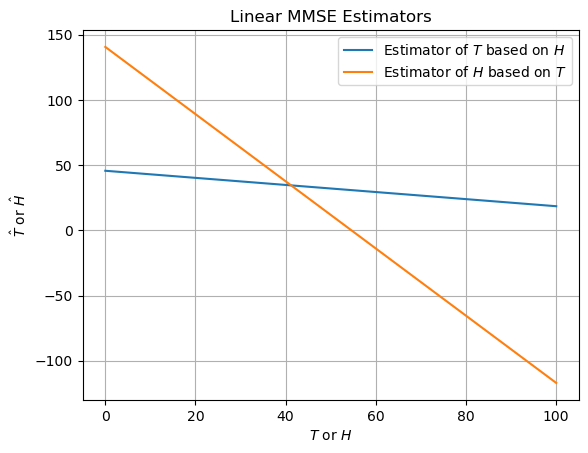

In [8]:
# Data from the second .txt file is imported.
filename2 = 'dataNewZ.txt'
T2 = np.loadtxt(filename2)[:, 0]
H2 = np.loadtxt(filename2)[:, 1]

# Linear estimator for T is created
def That(muT, muH, covTH, sigmaH, H):
    return muT + (covTH/sigmaH)*(H-muH)

# T value is estimated for the values of H_est
H_est = np.linspace(0, 100, 50)
Th = []

# For each value of H in H_est, calculate its corresponding estimated T.
for i in range(len(H_est)):
    Th.append(That(muT_estim, muH_estim, mat_cov_estim[0, 1], mat_cov_estim[1,1], H_est[i]))

# Linear estimator for H is created
def Hhat(muH, muT, covHT, sigmaT, T):
    return muH + (covHT/sigmaT)*(T-muT)

# H value is estimated for the values of T_est
T_est = np.linspace(0, 100, 50)
Hh = []

# For each value of T in T_est, calculate its corresponding estimated H.
for i in range(len(T_est)):
    Hh.append(Hhat(muH_estim, muT_estim, mat_cov_estim[1, 0], mat_cov_estim[0,0], T_est[i]))

# Linear MMSE estimator of T based on H is plotted
plt.plot(H_est, Th, label='Estimator of $T$ based on $H$')

# Linear MMSE estimator of H based on T is plotted
plt.plot(T_est, Hh, label='Estimator of $H$ based on $T$')

plt.grid()
plt.xlabel(r'$T$ or $H$')
plt.ylabel(r'$\hat{T}$ or $\hat{H}$')
plt.title('Linear MMSE Estimators')
plt.legend()

plt.show()


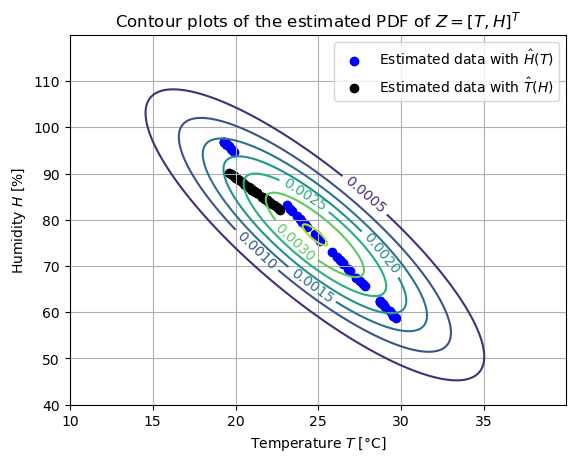

In [9]:
# Copies of the vectors extracted from the new .txt file are generated to replace their values without modifying the original data.
H2_complete = H2.copy()
T2_complete = T2.copy()

# For each missing temperature data, its value is calculated according to its corresponding humidity data, and this
# estimated value is placed in its respective position within the created copy of the humidity vector.
# For each missing humidity data, its value is calculated according to its corresponding temperature data, and this
# estimated value is placed in its respective position within the created copy of the temperature vector.
for i in range(len(H2)):
    if H2[i] == -10000:
        H_estimated = np.round(Hhat(muH_estim, muT_estim, mat_cov_estim[1, 0], mat_cov_estim[0,0], T2[i]), 1)
        H2_complete[i] = H_estimated
    if T2[i] == -10000:
        T_estimated = np.round(That(muT_estim, muH_estim, mat_cov_estim[0, 1], mat_cov_estim[1,1], H2[i]), 1)
        T2_complete[i] = T_estimated

# Vectors with 't' and 'h' values are generated to create a grid (T_grid, H_grid) on which to draw contour plots.
step = 0.05
t = np.arange(10, 40, step)
h = np.arange(40, 120, step)

# Grid (T_grid, H_grid) is generated. T_grid and H_grid are matrices representing points in the R^2 plane.
T_grid, H_grid = np.meshgrid(t, h)

# The multivariate_normal function is used to define the Gaussian function on the Z axis generated with the different data in H_grid and T_grid.
# The vector Z is defined as the Gaussian pdf represented by the mean vector [muT_estim, muH_estim] and the covariance matrix mat_cov_estim.
pos = np.dstack((T_grid, H_grid))
rv = multivariate_normal([muT_estim, muH_estim], mat_cov_estim)
Z = rv.pdf(pos)

# Contour plots of the pdf of Z are plotted along with the estimated T and H data from those provided in the new text file.
fig, ax = plt.subplots()
CS = plt.contour(T_grid, H_grid, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_xlabel(r'Temperature $T$ [°C]')
ax.set_ylabel(r'Humidity $H$ [%]')
ax.set_title(r'Contour plots of the estimated PDF of $Z = [T, H]^T$')
ax.grid()

blueT = []
blackT = []
blueH = []
blackH = []

for i in range(len(H2_complete)):
    if i < 50:
        blueT.append(T2_complete[i])
        blueH.append(H2_complete[i])
    else:
        blackT.append(T2_complete[i])
        blackH.append(H2_complete[i])

plt.scatter(blueT, blueH, c='b', label=r'Estimated data with $\hat{H}(T)$')
plt.scatter(blackT, blackH, c='k', label=r'Estimated data with $\hat{T}(H)$')
plt.legend()
plt.show()


#### It can be noted that the estimated data for each variable are consistent with the estimated PDF of the random vector $Z$.